In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def print_stats(data, metric, phenotypes):
    print()
    print(f"Metric {metric}")
    for pt in phenotypes:
        print(pt)
        print(f"    mean: {round(data[f'{pt}_{metric}'].mean(), 4)}")
        print(f"    var: {round(data[f'{pt}_{metric}'].var(), 4)}")
        print(f"    std: {round(data[f'{pt}_{metric}'].std(), 4)}")
    print()
    
def detected_outliers(data, phenotype, metric, margin):
    t = data[data[f"{phenotype}_{metric}"] > margin]
    
    files = t["filename"].tolist()
    values = t[f"{phenotype}_{metric}"].tolist()
    
    print(f"Nro. Files: {len(files)}")
    for v in zip(files, values):
        print(f"{v[0]} | {v[1]}")

def plot_boxplot_metric(data, phenotype, metric):
    data_plot = {}

    for pt in phenotypes:
        p = pt.split("-")[1]
        if p == phenotype:
            data_plot[pt] = data[f"{pt}_{metric}"]

    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 

    # plt.figure(figsize=(2, 10))
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.boxplot(data_plot.values())
    ax.set_title(f'Error absoluto medio (MAE)', fontsize=20)
    plt.xticks([1, 2, 3], ['SM300', 'SM60', 'Ratio'])
    ax.set_xlabel(f'{phenotype}', fontsize=20)
    ax.set_ylabel('Error', fontsize=20)
    #ax.set_xticklabels(data_plot.keys())

In [3]:
EXP_NUM = 2
TOP_N_FEATURE = 10

phenotypes = [
    "SM300-Efficiency", "SM300-Rate", "SM300-Lag", "SM300-AUC",
    "SM60-Efficiency",  "SM60-Rate",  "SM60-Lag",  "SM60-AUC",
    "Ratio-Efficiency", "Ratio-Rate", "Ratio-Lag", "Ratio-AUC",
]


files_data_df = pd.read_csv(f"/home/khaldrem/code/sc_regmod/dataset/models/exp_{EXP_NUM}_file_data.csv")
data_scoring_metrics = pd.read_csv(f'/home/khaldrem/code/sc_regmod/dataset/models/filter/{EXP_NUM}/csv/scoring_metrics_overall.csv')

In [4]:
print(f"Archivos que quedan fuera: {files_data_df.loc[files_data_df['data_length'] <= TOP_N_FEATURE].shape[0]}")
print(f"Litado: {files_data_df.loc[files_data_df['data_length'] <= TOP_N_FEATURE]['filename'].tolist()}")

Archivos que quedan fuera: 2699
Litado: ['YCL059C', 'YBR004C', 'YDR241W', 'YKL041W', 'YFL032W', 'YGR148C', 'YHR167W', 'YGL098W', 'YLR323C', 'YCR097W', 'YOL068C', 'YNR077C', 'YBR248C', 'YLR317W', 'YGR010W', 'YNL274C', 'YDR156W', 'YMR168C', 'YNL086W', 'YHR083W', 'YOR125C', 'YBR273C', 'YFL060C', 'YHR156C', 'YGL193C', 'YPL261C', 'YNL129W', 'YLR038C', 'YGR055W', 'YDR441C', 'YCR031C', 'YJL119C', 'YBR009C', 'YMR166C', 'YBL056W', 'YOL065C', 'YAR053W', 'YDR055W', 'YER063W', 'YGL079W', 'YML085C', 'YFR046C', 'YBR195C', 'YDL016C', 'YGR209C', 'YLR365W', 'YOR064C', 'YHR153C', 'YPL145C', 'YHL003C', 'YLR178C', 'YGR076C', 'YGR039W', 'YER183C', 'YLR428C', 'YPL211W', 'YMR184W', 'YGL182C', 'YJL191W', 'YPL200W', 'YKL058W', 'YLR078C', 'YGR263C', 'YJL142C', 'YDL168W', 'YJL048C', 'YDR447C', 'YER106W', 'YAL025C', 'YDR272W', 'YGR181W', 'YEL029C', 'YLR400W', 'YGR106C', 'YBL041W', 'YPL230W', 'YNL320W', 'YPR109W', 'YGL147C', 'YNL198C', 'YBL038W', 'YAR008W', 'YOR327C', 'YNL098C', 'YDL229W', 'YLR229C', 'YBR174C', 'Y

In [5]:
print(f"Cantidad de modelos entrenado por fenotipo: { (files_data_df.loc[files_data_df['data_length'] <= TOP_N_FEATURE].shape[0])}")

Cantidad de modelos entrenado por fenotipo: 2699


In [6]:
detected_outliers(data_scoring_metrics, "SM300-Efficiency", "MAE", 1)

Nro. Files: 19
YBR029C | 396505518192.2405
YMR102C | 200996288882.3982
YDL088C | 76376635964.3732
YOL129W | 3998132926101.5854
YLL007C | 3867435536.7478
YGR115C | 4393135505242.0864
YMR098C | 1942407948938.628
YNL097C | 39341903796.2929
YIL092W | 15636507572887.018
YNL115C | 25755000373713.016
YER036C | 552518305463.2854
YMR206W | 6864691086213.47
YGR179C | 3.8718
YPR012W | 1593918924608.9895
YBR053C | 6767055412841.288
YHR020W | 244972504357.805
YCR079W | 65800567332.7745
YLR430W | 7661030102143.829
YJR154W | 1885703689773.0413


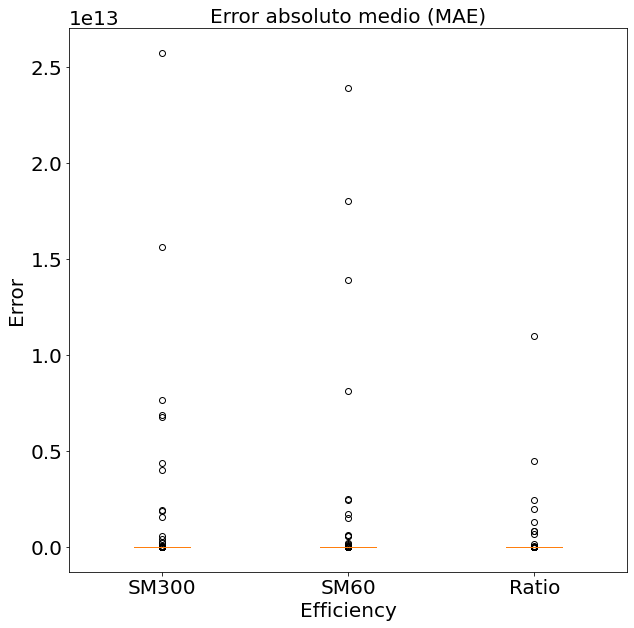

In [7]:
plot_boxplot_metric(data_scoring_metrics, "Efficiency", "MAE")

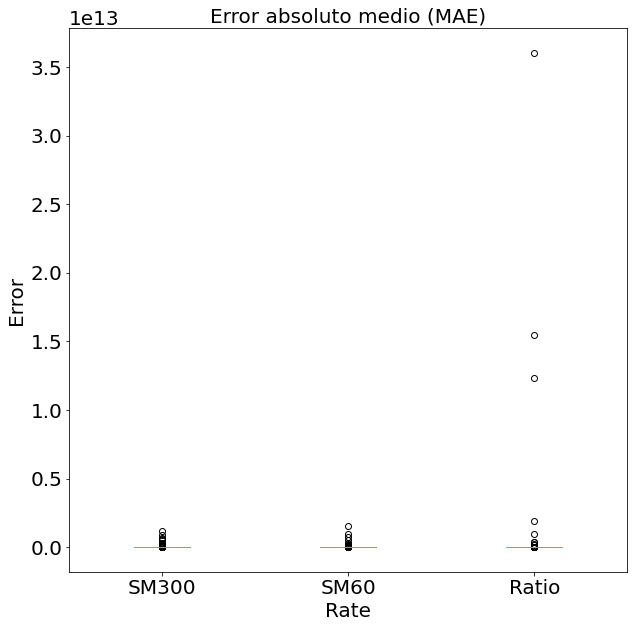

In [8]:
plot_boxplot_metric(data_scoring_metrics, "Rate", "MAE")

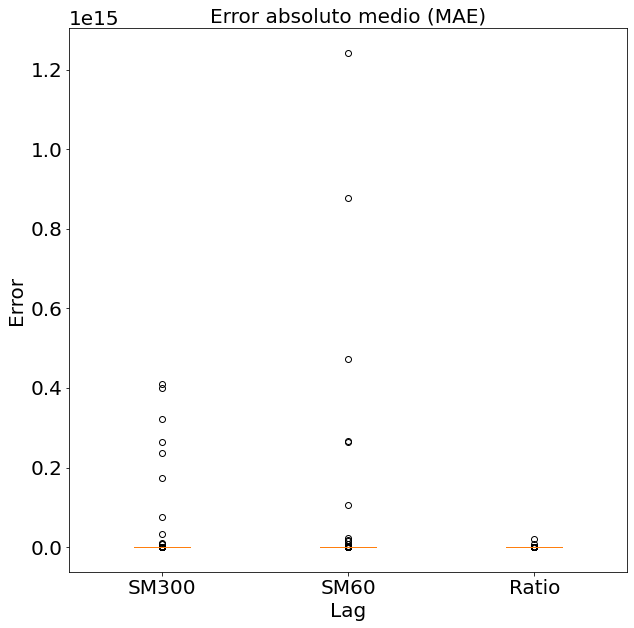

In [9]:
plot_boxplot_metric(data_scoring_metrics, "Lag", "MAE")

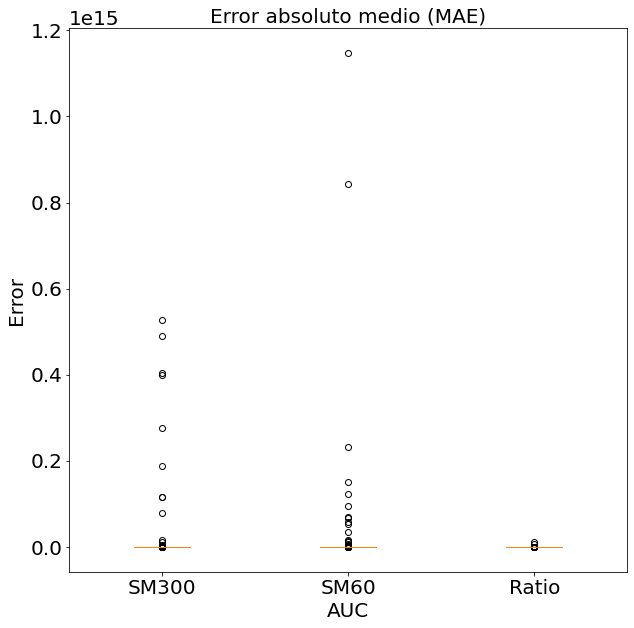

In [10]:
plot_boxplot_metric(data_scoring_metrics, "AUC", "MAE")

In [11]:
time_df = pd.read_csv(f'/home/khaldrem/code/sc_regmod/dataset/models/filter/{EXP_NUM}/csv/time_metrics_overall.csv')

In [12]:
time_df.head()

,Unnamed: 0,filename,total_per_file,SM300-Efficiency_training_model_time,SM300-Efficiency_test_model_time,SM300-Rate_training_model_time,SM300-Rate_test_model_time,SM300-Lag_training_model_time,SM300-Lag_test_model_time,SM300-AUC_training_model_time,...,SM60-AUC_training_model_time,SM60-AUC_test_model_time,Ratio-Efficiency_training_model_time,Ratio-Efficiency_test_model_time,Ratio-Rate_training_model_time,Ratio-Rate_test_model_time,Ratio-Lag_training_model_time,Ratio-Lag_test_model_time,Ratio-AUC_training_model_time,Ratio-AUC_test_model_time
0,0,YEL023C,2.1949,0.9265,0.0007,0.1184,0.0008,0.1285,0.0006,0.1202,...,0.1016,0.0006,0.1057,0.0007,0.1030,0.0006,0.0918,0.0006,0.0942,0.0006
1,1,YMR303C,1.3094,0.1019,0.0006,0.1004,0.0006,0.0994,0.0006,0.1025,...,0.1001,0.0007,0.0997,0.0006,0.1067,0.0009,0.0964,0.0006,0.0960,0.0006
2,2,YIL063C,1.2377,0.1045,0.0006,0.1040,0.0008,0.1005,0.0005,0.0956,...,0.1001,0.0005,0.0988,0.0008,0.1007,0.0005,0.0885,0.0006,0.0921,0.0008
3,3,YLR389C,1.3433,0.1001,0.0006,0.1024,0.0006,0.1066,0.0010,0.1052,...,0.1016,0.0006,0.1046,0.0010,0.0975,0.0010,0.0982,0.0006,0.0995,0.0006
4,4,YLR247C,1.6763,0.1193,0.0011,0.1373,0.0013,0.1271,0.0012,0.1245,...,0.1309,0.0012,0.1307,0.0011,0.1242,0.0014,0.1207,0.0011,0.1346,0.0011


In [13]:
time_df.describe()

,Unnamed: 0,total_per_file,SM300-Efficiency_training_model_time,SM300-Efficiency_test_model_time,SM300-Rate_training_model_time,SM300-Rate_test_model_time,SM300-Lag_training_model_time,SM300-Lag_test_model_time,SM300-AUC_training_model_time,SM300-AUC_test_model_time,...,SM60-AUC_training_model_time,SM60-AUC_test_model_time,Ratio-Efficiency_training_model_time,Ratio-Efficiency_test_model_time,Ratio-Rate_training_model_time,Ratio-Rate_test_model_time,Ratio-Lag_training_model_time,Ratio-Lag_test_model_time,Ratio-AUC_training_model_time,Ratio-AUC_test_model_time
count,3183.00000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,...,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000
mean,1591.00000,1.435641,0.108751,0.000872,0.110074,0.000897,0.110707,0.000897,0.110453,0.000908,...,0.110486,0.000892,0.110687,0.000894,0.110545,0.000885,0.110665,0.000878,0.110551,0.000893
std,918.99728,0.264567,0.021217,0.000878,0.020658,0.001109,0.021068,0.001110,0.020635,0.001170,...,0.020700,0.001134,0.020864,0.001063,0.020620,0.000965,0.020658,0.001038,0.020779,0.001015
min,0.00000,1.173700,0.082400,0.000500,0.081300,0.000500,0.082300,0.000500,0.080500,0.000500,...,0.082800,0.000500,0.082500,0.000500,0.081300,0.000500,0.083500,0.000500,0.081800,0.000500
25%,795.50000,1.281500,0.098200,0.000600,0.097000,0.000600,0.097550,0.000600,0.097400,0.000600,...,0.097400,0.000600,0.097600,0.000600,0.097600,0.000600,0.097500,0.000600,0.097500,0.000600
50%,1591.00000,1.322200,0.103700,0.000700,0.101700,0.000800,0.102300,0.000800,0.102100,0.000800,...,0.102100,0.000800,0.102400,0.000800,0.102300,0.000800,0.102500,0.000800,0.102300,0.000800
75%,2386.50000,1.445850,0.115750,0.000900,0.121150,0.000900,0.121700,0.000900,0.120650,0.000900,...,0.120600,0.000900,0.121450,0.000900,0.121500,0.000900,0.122250,0.000900,0.120900,0.000900
max,3182.00000,3.367900,0.926500,0.021500,0.243500,0.030400,0.243200,0.032200,0.239400,0.031500,...,0.248200,0.032000,0.241100,0.022600,0.225900,0.028700,0.241700,0.031000,0.248700,0.029100


Text(0, 0.5, 'Valor')

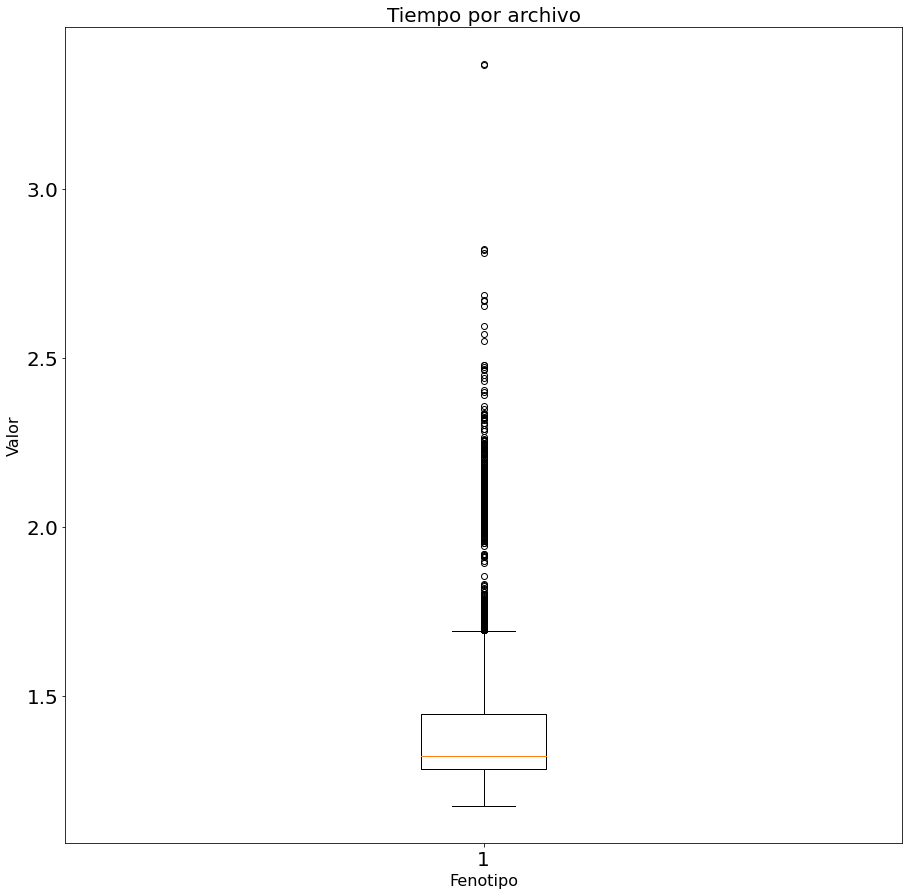

In [14]:
# time_plot = {}

# for pt in phenotypes:
#     p = pt.split("-")[1]
#     if p == "Efficiency":
#         data_plot[pt] = time_df[f"{pt}_{metric}"]

# # plt.figure(figsize=(2, 10))
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.boxplot(data_plot.values())
# ax.set_title(f'{phenotype} - Error absoluto medio (MAE)', fontsize=20)
# ax.set_xlabel('Fenotipo', fontsize=16)
# ax.set_ylabel('Valor', fontsize=16)
# ax.set_xticklabels(data_plot.keys())



fig, ax = plt.subplots(figsize=(15, 15))
ax.boxplot(time_df["total_per_file"])
ax.set_title(f'Tiempo por archivo', fontsize=20)
ax.set_xlabel('Fenotipo', fontsize=16)
ax.set_ylabel('Valor', fontsize=16)
# ax.set_xticklabels(data_plot.keys())
